ASSESMENT 3
BAT BEHAVIOR ANALYSIS
WE HAVE DONE DESCRIPTIVE AND INFERENTIAL ANALYSIS IN ASSESMENT 2. NOW WE WILL CONTINUE WITH PERFORMING FEATURE ENGINEERING, LINEAR REGRESSION MODELLING AND FINALLY PRODUCE REPORTS.

In [1]:
# IMPORTS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score




WHILE PERFORMING ASSESMENT 2, WE HAVE ALREADY CLEANED THE DATASETS. SO WE WILL DIRECTLY LOAD THE CLEANED DATASETS.

In [2]:
dataset1=pd.read_csv("/content/dataset1_cleaned.csv")



In [3]:
dataset1.head()

,start_time,bat_landing_to_food,habit,rat_period_start,rat_period_end,seconds_after_rat_arrival,risk,reward,month,sunset_time,hours_after_sunset,season
0,27/01/2018 23:44,0.04941,fast,27/01/2018 23:44,27/01/2018 23:50,12,0,1,1,27/01/2018 17:09,6.591111,0
1,27/01/2018 23:44,1.00000,fast,27/01/2018 23:44,27/01/2018 23:50,14,0,1,1,27/01/2018 17:09,6.591667,0
2,27/01/2018 23:45,6.00000,rat,27/01/2018 23:44,27/01/2018 23:50,49,1,0,1,27/01/2018 17:09,6.601389,0
3,27/01/2018 23:45,3.00000,fast,27/01/2018 23:44,27/01/2018 23:50,68,0,1,1,27/01/2018 17:09,6.606667,0
4,27/01/2018 23:45,8.00000,rat,27/01/2018 23:44,27/01/2018 23:50,84,1,0,1,27/01/2018 17:09,6.611111,0


In [4]:
dataset2=pd.read_csv('/content/dataset2_cleaned.csv')
dataset2.head()

,time,month,hours_after_sunset,bat_landing_number,food_availability,rat_minutes,rat_arrival_number
0,26/12/2017 16:13,0,-0.5,20,4.000000,0.0,0
1,26/12/2017 16:43,0,0.0,28,4.000000,0.0,0
2,26/12/2017 17:13,0,0.5,25,4.000000,0.0,0
3,26/12/2017 17:43,0,1.0,71,4.000000,0.0,0
4,26/12/2017 18:13,0,1.5,44,3.753857,0.0,0


In [5]:
dataset1['time'] = pd.to_datetime(dataset1['start_time'], errors='coerce')  #Converting to datetime format
dataset2['time'] = pd.to_datetime(dataset2['time'], errors='coerce')


/tmp/ipython-input-2117847752.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  dataset1['time'] = pd.to_datetime(dataset1['start_time'], errors='coerce')  #Converting to datetime format
/tmp/ipython-input-2117847752.py:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  dataset2['time'] = pd.to_datetime(dataset2['time'], errors='coerce')


In [6]:
#Sorting the datasets by time

dataset1 = dataset1.sort_values('time')
dataset2 = dataset2.sort_values('time')



FEATURE ENGINEERING

In [7]:
#Lets merge two datasets by time

df= pd.merge_asof(
    left=dataset1,
    right=dataset2,
    on='time',
    direction='backward',          #this means only past information is used so as to prevent future leakage
    tolerance=pd.Timedelta('30min'))   #using 30 mins to round off

In [8]:
df.head()

,start_time,bat_landing_to_food,habit,rat_period_start,rat_period_end,seconds_after_rat_arrival,risk,reward,month_x,sunset_time,hours_after_sunset_x,season,time,month_y,hours_after_sunset_y,bat_landing_number,food_availability,rat_minutes,rat_arrival_number
0,1/01/2018 1:52,2.00000,fast,1/01/2018 1:50,1/01/2018 1:55,115,0,1,1,31/12/2017 16:46,9.108333,0,2018-01-01 01:52:00,1.0,9.0,18.0,1.926882,4.933333,1.0
1,10/01/2018 4:12,1.00000,rat,10/01/2018 4:07,10/01/2018 4:15,306,1,0,1,9/01/2018 16:53,11.322222,0,2018-01-10 04:12:00,1.0,11.0,18.0,2.851613,8.566667,1.0
2,10/01/2018 23:34,4.00000,unknown,10/01/2018 23:32,10/01/2018 23:34,113,0,0,1,10/01/2018 16:54,6.673889,0,2018-01-10 23:34:00,1.0,6.5,38.0,2.000000,2.050000,2.0
3,27/01/2018 23:44,0.04941,fast,27/01/2018 23:44,27/01/2018 23:50,12,0,1,1,27/01/2018 17:09,6.591111,0,2018-01-27 23:44:00,1.0,6.5,64.0,2.550000,6.083333,1.0
4,27/01/2018 23:44,1.00000,fast,27/01/2018 23:44,27/01/2018 23:50,14,0,1,1,27/01/2018 17:09,6.591667,0,2018-01-27 23:44:00,1.0,6.5,64.0,2.550000,6.083333,1.0


In [9]:
#Lets check if our merge was successfull

duplicates = df.duplicated()
print("Duplicate rows:", duplicates.sum())

Duplicate rows: 0


In [10]:
print(df.isna().sum())

start_time                     0
bat_landing_to_food            0
habit                          0
rat_period_start               0
rat_period_end                 0
seconds_after_rat_arrival      0
risk                           0
reward                         0
month_x                        0
sunset_time                    0
hours_after_sunset_x           0
season                         0
time                           0
month_y                      121
hours_after_sunset_y         121
bat_landing_number           121
food_availability            121
rat_minutes                  121
rat_arrival_number           121
dtype: int64


In [11]:
df = df.dropna(subset=['bat_landing_number'])  #Dropping nan values



In [12]:
df.head()

,start_time,bat_landing_to_food,habit,rat_period_start,rat_period_end,seconds_after_rat_arrival,risk,reward,month_x,sunset_time,hours_after_sunset_x,season,time,month_y,hours_after_sunset_y,bat_landing_number,food_availability,rat_minutes,rat_arrival_number
0,1/01/2018 1:52,2.00000,fast,1/01/2018 1:50,1/01/2018 1:55,115,0,1,1,31/12/2017 16:46,9.108333,0,2018-01-01 01:52:00,1.0,9.0,18.0,1.926882,4.933333,1.0
1,10/01/2018 4:12,1.00000,rat,10/01/2018 4:07,10/01/2018 4:15,306,1,0,1,9/01/2018 16:53,11.322222,0,2018-01-10 04:12:00,1.0,11.0,18.0,2.851613,8.566667,1.0
2,10/01/2018 23:34,4.00000,unknown,10/01/2018 23:32,10/01/2018 23:34,113,0,0,1,10/01/2018 16:54,6.673889,0,2018-01-10 23:34:00,1.0,6.5,38.0,2.000000,2.050000,2.0
3,27/01/2018 23:44,0.04941,fast,27/01/2018 23:44,27/01/2018 23:50,12,0,1,1,27/01/2018 17:09,6.591111,0,2018-01-27 23:44:00,1.0,6.5,64.0,2.550000,6.083333,1.0
4,27/01/2018 23:44,1.00000,fast,27/01/2018 23:44,27/01/2018 23:50,14,0,1,1,27/01/2018 17:09,6.591667,0,2018-01-27 23:44:00,1.0,6.5,64.0,2.550000,6.083333,1.0


In [13]:
data=df.drop(columns=['start_time','habit','rat_period_start','rat_period_end','sunset_time','time','month_x','month_y','hours_after_sunset_x'])

In [14]:
data.head()

,bat_landing_to_food,seconds_after_rat_arrival,risk,reward,season,hours_after_sunset_y,bat_landing_number,food_availability,rat_minutes,rat_arrival_number
0,2.00000,115,0,1,0,9.0,18.0,1.926882,4.933333,1.0
1,1.00000,306,1,0,0,11.0,18.0,2.851613,8.566667,1.0
2,4.00000,113,0,0,0,6.5,38.0,2.000000,2.050000,2.0
3,0.04941,12,0,1,0,6.5,64.0,2.550000,6.083333,1.0
4,1.00000,14,0,1,0,6.5,64.0,2.550000,6.083333,1.0


In [15]:
# Lets create some new features from the existing ones. We will be creating interaction features so that our model will also get to learn from context and not just raw data.

In [16]:
data['rat_intensity'] = data['rat_arrival_number'] * data['rat_minutes']      #how many rat arrived and how long they stayed for

In [17]:
data['food_risk_interaction'] = data['food_availability'] * data['risk']      #risk taken by bold bats in terms of food availability

In [18]:
data['rat_bat_ratio'] = data['rat_arrival_number'] / (data['bat_landing_number'] + 1)     #this tells us the dominance of rats to predict vigilance and we
                                                                                          #add +1 to avoid dividing by 0.

In [19]:
data.head()

,bat_landing_to_food,seconds_after_rat_arrival,risk,reward,season,hours_after_sunset_y,bat_landing_number,food_availability,rat_minutes,rat_arrival_number,rat_intensity,food_risk_interaction,rat_bat_ratio
0,2.00000,115,0,1,0,9.0,18.0,1.926882,4.933333,1.0,4.933333,0.000000,0.052632
1,1.00000,306,1,0,0,11.0,18.0,2.851613,8.566667,1.0,8.566667,2.851613,0.052632
2,4.00000,113,0,0,0,6.5,38.0,2.000000,2.050000,2.0,4.100000,0.000000,0.051282
3,0.04941,12,0,1,0,6.5,64.0,2.550000,6.083333,1.0,6.083333,0.000000,0.015385
4,1.00000,14,0,1,0,6.5,64.0,2.550000,6.083333,1.0,6.083333,0.000000,0.015385


Text(0.5, 1.0, 'Heatmap')

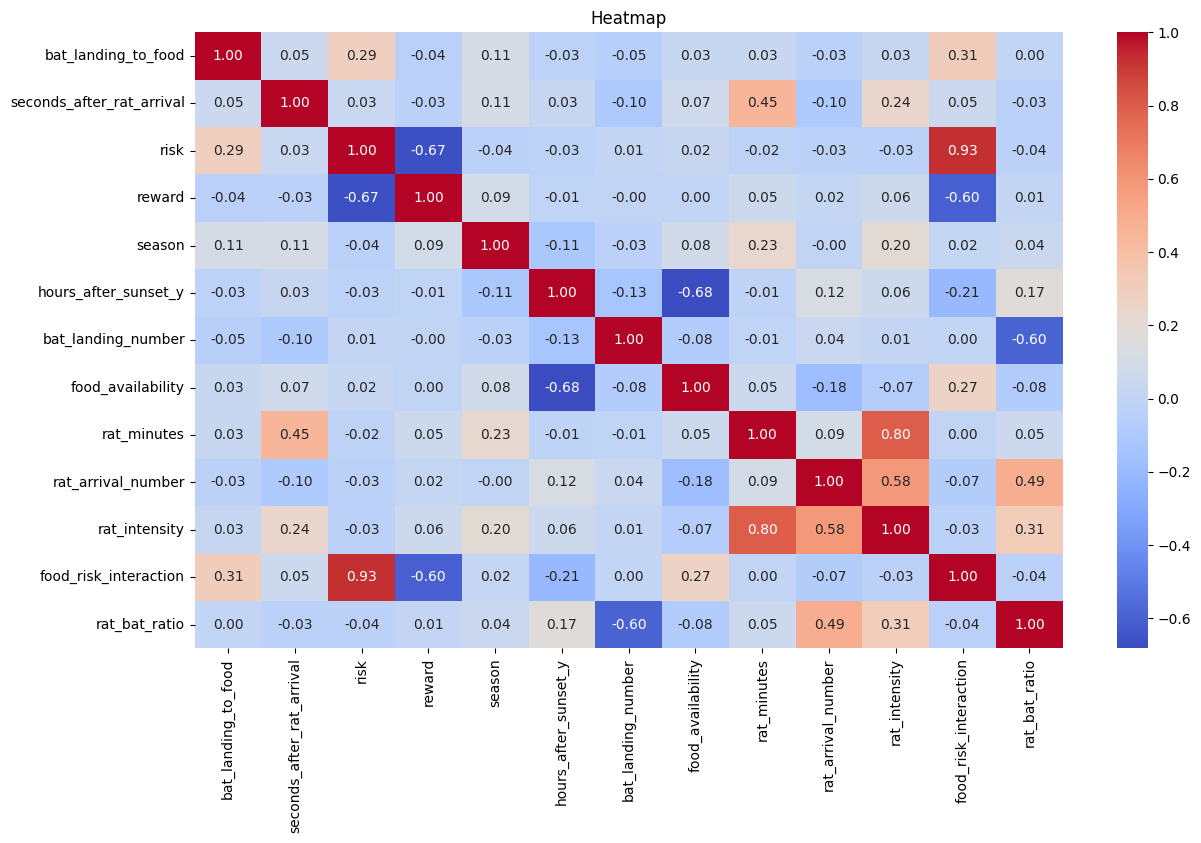

In [20]:
#Heatmap
#Lets create a heatmap to find out variables with strong correlations to our target variable which will be 'bat_landing_to_food'
plt.figure(figsize=(14,8))
sns.heatmap(data.corr(numeric_only=True),cmap='coolwarm', annot=True,fmt=".2f")
plt.title("Heatmap")


Text(0.5, 1.0, 'Heatmap')

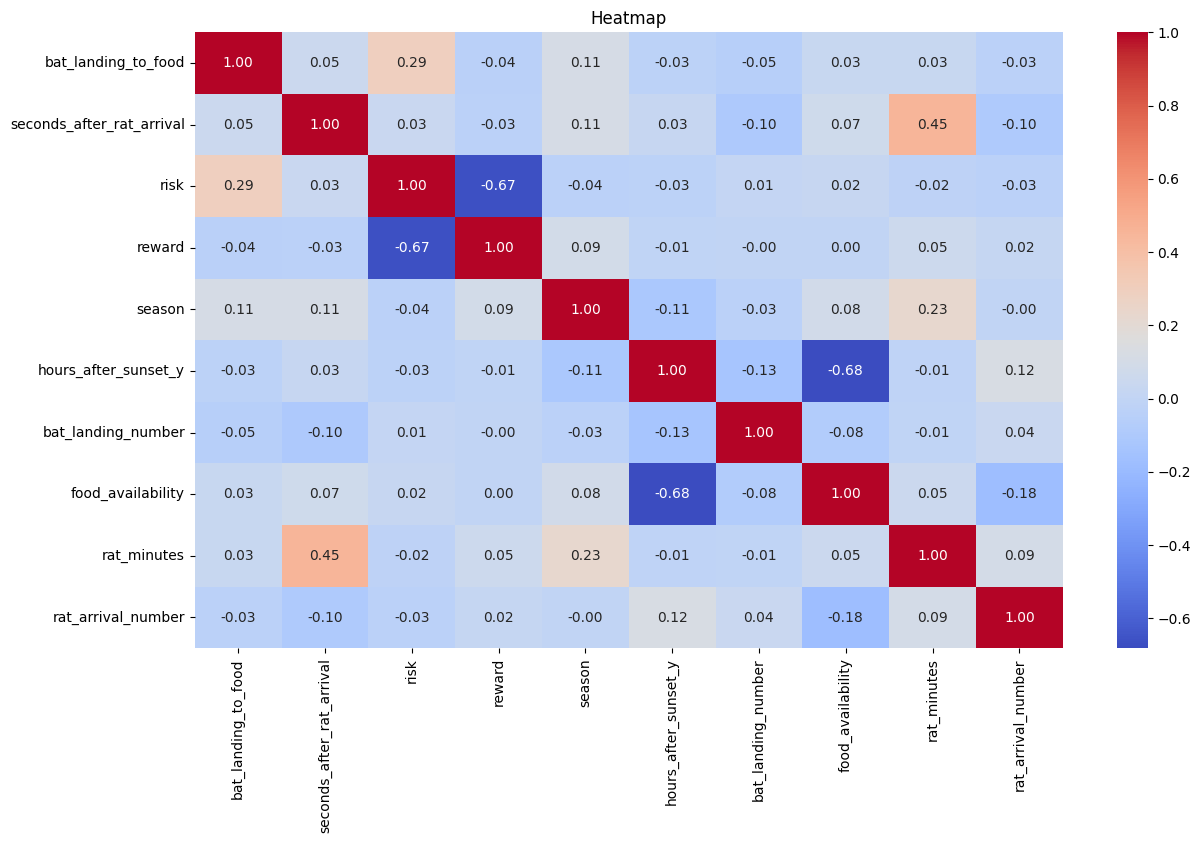

In [21]:
plt.figure(figsize=(14,8))
sns.heatmap(data[['bat_landing_to_food','seconds_after_rat_arrival','risk','reward','season','hours_after_sunset_y','bat_landing_number','food_availability','rat_minutes','rat_arrival_number']].corr(numeric_only=True),cmap='coolwarm', annot=True,fmt=".2f")
plt.title("Heatmap")

In [22]:
#Train Test Split
X=data[['seconds_after_rat_arrival','risk','season','hours_after_sunset_y','bat_landing_number','food_availability','rat_minutes','rat_arrival_number']]
y=data['bat_landing_to_food']
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [23]:
#Scaling
#We will use the Standard Scaler for scaling all the continuous variables.
scaler=StandardScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)


In [24]:
#Fitting a linear regression model
model=LinearRegression()
model.fit(X_train_scaled,Y_train)

LinearRegression()

In [25]:
#prediction
y_pred=model.predict(X_test_scaled)

In [26]:
#model performance

mse=mean_squared_error(Y_test,y_pred)
rmse = np.sqrt(mse)
r2=r2_score(Y_test,y_pred)

In [27]:
print(f" Root Mean Squared Error (RMSE) is : {rmse:.4f}")

print(f"R-squared (R²) is : {r2:.4f}")

 Root Mean Squared Error (RMSE) is : 9.9195
R-squared (R²) is : 0.0738


In [28]:
print(y.describe())

count    743.000000
mean       8.543875
std       12.612248
min        0.010238
25%        1.000000
50%        4.000000
75%       10.000000
max       83.000000
Name: bat_landing_to_food, dtype: float64


In [39]:

#Adding the interaction features that we derived.


X1=data[['seconds_after_rat_arrival','risk','season','hours_after_sunset_y','bat_landing_number','rat_minutes','rat_arrival_number','rat_intensity','food_risk_interaction','rat_bat_ratio']]
y1=data['bat_landing_to_food']
X_train1,X_test1,Y_train1,Y_test1=train_test_split(X1,y1,test_size=0.2, random_state=80)




scaler=StandardScaler()

X_train_scaled1=scaler.fit_transform(X_train1)
X_test_scaled1=scaler.transform(X_test1)

new_model=LinearRegression()
new_model.fit(X_train_scaled1,Y_train1)
y_pred1=new_model.predict(X_test_scaled1)

mse1=mean_squared_error(Y_test1,y_pred1)
rmse1 = np.sqrt(mse1)
r21=r2_score(Y_test1,y_pred1)
print(f" New Root Mean Squared Error (RMSE-New) is : {rmse1:.4f}")

print(f" New R-squared (R²-New) is : {r21:.4f}")

 New Root Mean Squared Error (RMSE-New) is : 10.7454
 New R-squared (R²-New) is : 0.1403


                     Feature  Coefficient
8      food_risk_interaction     2.423415
1                       risk     1.413525
2                     season     1.379559
7              rat_intensity     1.261718
0  seconds_after_rat_arrival     0.405779
3       hours_after_sunset_y     0.316111
9              rat_bat_ratio    -0.476038
4         bat_landing_number    -0.599220
5                rat_minutes    -0.790779
6         rat_arrival_number    -0.960110 



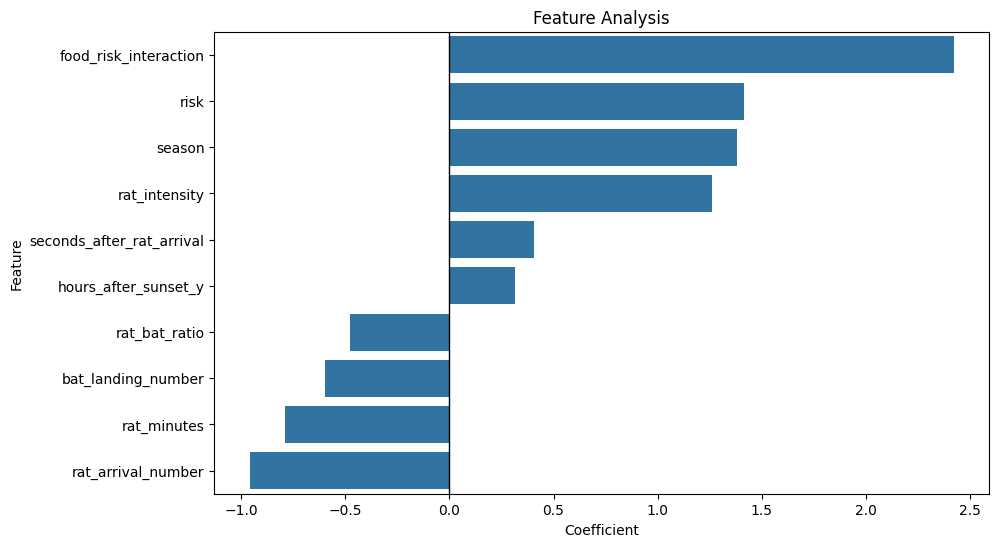

In [40]:
#Analyzing feature importance

#creating a dataframe that consist of the above features and how much it influences target variable
coefficients = pd.DataFrame({
    'Feature': X1.columns,
    'Coefficient':new_model.coef_
}).sort_values(by='Coefficient', ascending=False)

print(coefficients, "\n")

#Plotting plots of coefficients
plt.figure(figsize=(10,6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title('Feature Analysis')
plt.axvline(0, color='black', linewidth=1)
plt.show()

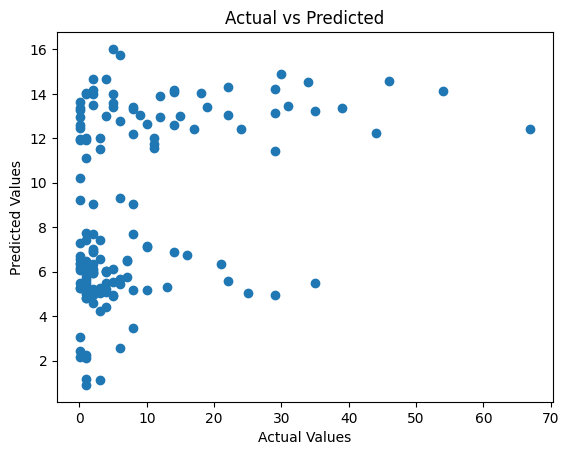

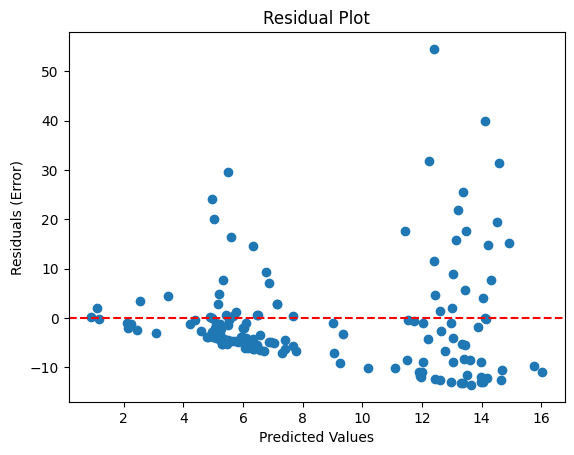

In [41]:
plt.scatter(Y_test1, y_pred1)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")

plt.figure()
residuals = Y_test1 - y_pred1
plt.scatter(y_pred1, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Error)")
plt.title("Residual Plot")
plt.show()

In [42]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled1, Y_train1)
ridge_r2 = ridge_model.score(X_test_scaled1, Y_test1)

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_scaled1, Y_train1)
lasso_r2 = lasso_model.score(X_test_scaled1, Y_test1)

print(f"Ridge R²: {ridge_r2:.4f}")
print(f"Lasso R²: {lasso_r2:.4f}\n")

Ridge R²: 0.1399
Lasso R²: 0.1315



In [44]:
#Lets check using random forest regressor


from sklearn.ensemble import RandomForestRegressor


random_model = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    max_depth=None )

random_model.fit(X_train1, Y_train1)


y_pred_random = random_model.predict(X_test1)

r2_random = r2_score(Y_test1, y_pred_random)
rmse_random = np.sqrt(mean_squared_error(Y_test1, y_pred_random))

print("Random Forest:")
print("R²:", round(r2_random, 4))
print("RMSE:", round(rmse_random, 4))

Random Forest:
R²: 0.1395
RMSE: 10.7507


Investigation B

In [45]:
#Lets split winter and spring data


winter_data=data[data['season']==0]
spring_data=data[data['season']==1]

independent_features=['seconds_after_rat_arrival','risk','hours_after_sunset_y','bat_landing_number','rat_minutes','rat_arrival_number','rat_intensity','food_risk_interaction','rat_bat_ratio']



In [47]:
#Lets create variables

X_winter=winter_data[independent_features]
y_winter=winter_data['bat_landing_to_food']
X_spring=spring_data[independent_features]
y_spring=spring_data['bat_landing_to_food']

#Winter

scaler_winter=StandardScaler()
X_winter_scaled=scaler_winter.fit_transform(X_winter)

model_winter=LinearRegression()
model_winter.fit(X_winter_scaled,y_winter)




#Spring

scaler_spring=StandardScaler()
X_spring_scaled=scaler_spring.fit_transform(X_spring)

model_spring=LinearRegression()
model_spring.fit(X_spring_scaled,y_spring)



#Comparing coefficients
coeffiecients_compared = pd.DataFrame({
    'Feature': independent_features,
    'Winter_Coeff': model_winter.coef_,
    'Spring_Coeff': model_spring.coef_,
    'Difference': model_spring.coef_ - model_winter.coef_
}).sort_values('Difference', ascending=False)

print(coeffiecients_compared)

                     Feature  Winter_Coeff  Spring_Coeff  Difference
4                rat_minutes     -6.794501     -1.787327    5.007174
1                       risk     -1.826090      0.814073    2.640163
5         rat_arrival_number     -2.536233     -1.229521    1.306712
7      food_risk_interaction      2.344568      3.633516    1.288947
8              rat_bat_ratio     -0.293013     -0.847285   -0.554272
3         bat_landing_number     -0.572103     -1.190884   -0.618780
0  seconds_after_rat_arrival      1.802632      0.264998   -1.537634
2       hours_after_sunset_y      1.824811      0.245932   -1.578879
6              rat_intensity      4.958671      2.659579   -2.299092
